# DATA PREPROCESSING FOR GENDER CLASSIFICATION USING CNN

### Dataset
- PETA (Pedestrian Attribute) Dataset is a dataset fore recognizing pedestrian attributes, such as gender and clothing style, at a far distance. It is of interest in video surveillance scenarios where face and body close-shots and hardly available. It consists of 19,000 pedestrian images with 65 attributes (61 binary and 4 multi-class). Those images contain 8705 persons.
- The dataset is observed to have pedestrian images of different formats from different sources (.jpg,.bmp,.png) and is arranged into folders according to the source it is taken from. Each folder has a Labels.txt file which contain the label like gender, clothing style etc., for each image in that folder.
- [Link to the dataset](https://mmlab.ie.cuhk.edu.hk/projects/PETA.html)

In [ ]:
#if this link does not work... download PETA dataset from the web.
!wget -O peta.zip "https://www.dropbox.com/scl/fi/2e7y0oe4v0f4eql47cdt1/Copy-PETA.zip?rlkey=2cxlp2y0kmd0bqfrezewip7z1&st=94jual2a&dl=0"

--2024-12-18 16:09:12--  https://www.dropbox.com/scl/fi/2e7y0oe4v0f4eql47cdt1/Copy-PETA.zip?rlkey=2cxlp2y0kmd0bqfrezewip7z1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce438b0b4d38950e86bff65a6b4.dl.dropboxusercontent.com/cd/0/inline/Cgd3R0UoLCbohFZ6A5m1EAOi39ufQf-OW8q7s1T5B7g6oJVhfR5nOsr_RKFZ4nxUTV_Q8wH2Sq3sKt8JRogBkSx1JvzQcB5cW7qoGNz3yAwmK4YcbP4ei5F1YmewSdBSwy-kd0s1JWBgt70ybfX9Y24x/file# [following]
--2024-12-18 16:09:13--  https://uce438b0b4d38950e86bff65a6b4.dl.dropboxusercontent.com/cd/0/inline/Cgd3R0UoLCbohFZ6A5m1EAOi39ufQf-OW8q7s1T5B7g6oJVhfR5nOsr_RKFZ4nxUTV_Q8wH2Sq3sKt8JRogBkSx1JvzQcB5cW7qoGNz3yAwmK4YcbP4ei5F1YmewSdBSwy-kd0s1JWBgt70ybfX9Y24x/file
Resolving uce438b0b4d38950e86bff65a6b4.dl.dropboxusercontent.com (uce438b0b4d38950e86bff65a6b4.dl.dropboxusercontent.com)... 162.125.3.15, 2620:

In [ ]:
!unzip peta.zip

Streaming output truncated to the last 5000 lines.
  inflating: PETA dataset/TownCentre/archive/199_4290.jpg  
  inflating: PETA dataset/TownCentre/archive/199_4299.jpg  
  inflating: PETA dataset/TownCentre/archive/19_219.jpg  
  inflating: PETA dataset/TownCentre/archive/19_228.jpg  
  inflating: PETA dataset/TownCentre/archive/19_237.jpg  
  inflating: PETA dataset/TownCentre/archive/19_246.jpg  
  inflating: PETA dataset/TownCentre/archive/19_255.jpg  
  inflating: PETA dataset/TownCentre/archive/19_264.jpg  
  inflating: PETA dataset/TownCentre/archive/19_273.jpg  
  inflating: PETA dataset/TownCentre/archive/19_282.jpg  
  inflating: PETA dataset/TownCentre/archive/19_291.jpg  
  inflating: PETA dataset/TownCentre/archive/19_300.jpg  
  inflating: PETA dataset/TownCentre/archive/19_309.jpg  
  inflating: PETA dataset/TownCentre/archive/19_318.jpg  
  inflating: PETA dataset/TownCentre/archive/19_327.jpg  
  inflating: PETA dataset/TownCentre/archive/19_336.jpg  
  inflating: PETA

### Sample Image

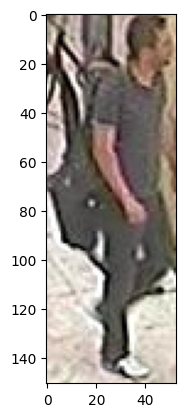

In [ ]:
import matplotlib.pyplot as plt
image= plt.imread('PETA dataset/3DPeS/archive/1_1_FRAME_12_RGB.bmp')
plt.imshow(image)

### Data preprocessing
- The images in the dataset come in a variety of dimensions as shown below and must be resized to a fixed dimension for it to be useful to the CNN.

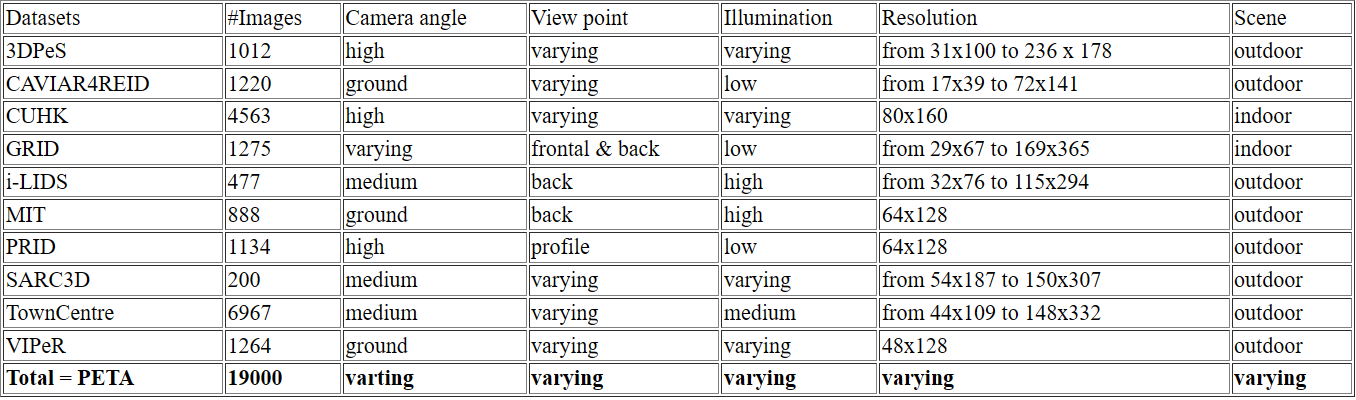

- We will be using zero padding inline with the findings in [this paper.](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0263-7)

- We plot the ditribution of the height and weight of the images to find an appropriate dimension to resize them to..

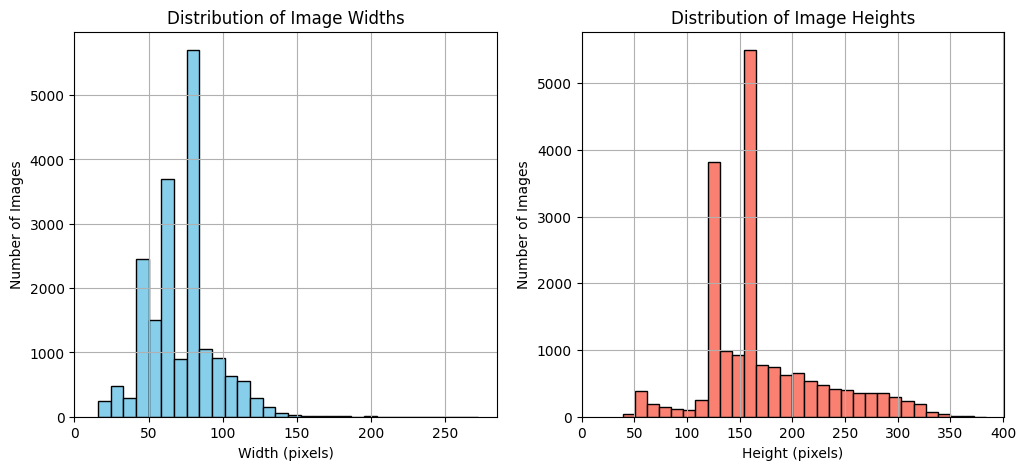

Number of images:19000


In [ ]:
import os
from PIL import Image

def plot_image_dimensions(folder_path):
    widths = []
    heights = []
    count=0

    # Traverse through all folders and subfolders
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Supported formats
                img_path = os.path.join(root, filename)
                with Image.open(img_path) as img:
                    widths.append(img.width)
                    heights.append(img.height)
                count+=1

    # Plotting Width Histogram
    plt.figure(figsize=(12, 5))

    plt.subplot(1,2,1)
    plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Number of Images')
    plt.grid()
    plt.xlim(left=0)


    # Plotting Height Histogram
    plt.subplot(1,2,2)
    plt.hist(heights, bins=30, color='salmon', edgecolor='black')
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Number of Images')
    plt.grid()
    plt.xlim(left=0)


    plt.show()

    print('Number of images:'+str(count))

plot_image_dimensions('PETA dataset')


- based on these results... we decide to resize them to 128*256 dimension and resize all the exceeding images to this dimension.
- around 2.5k Images (out of a total of 19,000) were exceeding this dimension.

In [ ]:
import os
def resize_if_exceeds(input_folder, target_size=(128, 256)):
    # Walk through all directories and files
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith((".jpg", ".png", ".jpeg",".bmp")):  # You can add more extensions if needed
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as img:
                        # Get image dimensions
                        width, height = img.size

                        # Check if the image exceeds the target size
                        if width > target_size[0] or height > target_size[1]:
                            # Resize the image
                            img_resized = img.resize(target_size,Image.Resampling.LANCZOS)

                            # Save the resized image, replacing the original one
                            img_resized.save(image_path)
                            print(f"Resized and replaced: {image_path} (Original: {width}x{height}, New: {target_size[0]}x{target_size[1]})")
                        else:
                            print(f"Image size within limit: {image_path} ({width}x{height})")
                except Exception as e:
                    print(f"Failed to resize {image_path}: {e}")

# Specify the input folder where your current images are located
input_folder = './PETA dataset'
resize_if_exceeds(input_folder)


Streaming output truncated to the last 5000 lines.
Image size within limit: ./PETA dataset/CUHK/archive/2130.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/1754.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/0338.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/0747.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/1280.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/3525.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/2732.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/0978.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/3258.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/4334.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/2723.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/1503.png (80x160)
Image size within limit: ./PETA dataset/CUHK/archive/1232.png (80x160)
Image size within limit: .

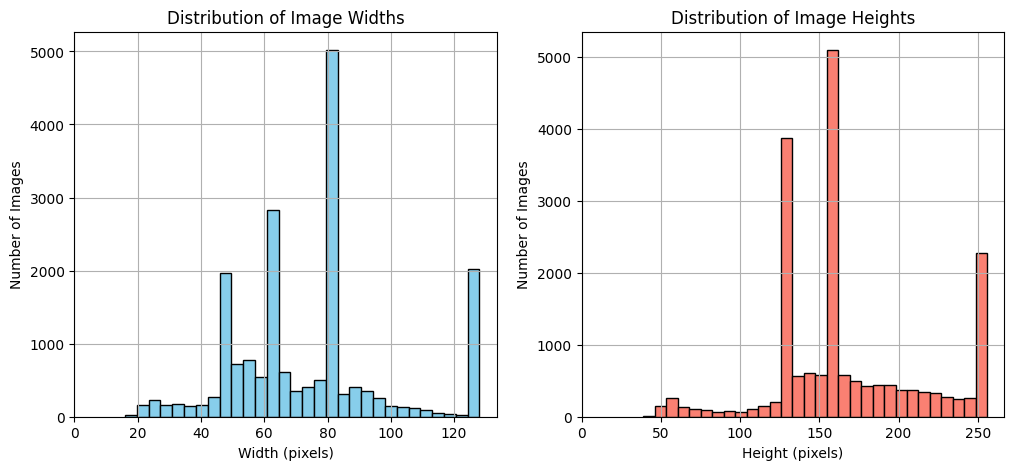

Number of images:19000


In [ ]:
plot_image_dimensions(input_folder)

- We see that the images exceeding the dimensions are now resized.
- Now comes the zero padding part where we bring the images to a uniform dimension.

In [ ]:
def zero_pad_images(input_folder, target_size=(128, 256)):
    # Walk through all directories and files
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith((".jpg", ".png", ".jpeg",".bmp")):  # Add more extensions if needed
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as img:
                        # Get original image dimensions
                        width, height = img.size

                        # Create a new image with the target size and a black background (zero padding)
                        padded_image = Image.new("RGB", target_size, (0, 0, 0))

                        # Calculate the position to paste the original image (center it)
                        paste_position = (
                            (target_size[0] - width) // 2,  # X position (width)
                            (target_size[1] - height) // 2  # Y position (height)
                        )

                        # Paste the original image onto the padded (black background) image
                        padded_image.paste(img, paste_position)

                        # Save the padded image, replacing the original one
                        padded_image.save(image_path)
                        print(f"Zero-padded and replaced: {image_path}")
                except Exception as e:
                    print(f"Failed to process {image_path}: {e}")

# Specify the input folder where your current images are located
zero_pad_images(input_folder)

Streaming output truncated to the last 5000 lines.
Zero-padded and replaced: ./PETA dataset/CUHK/archive/2130.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/1754.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/0338.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/0747.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/1280.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/3525.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/2732.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/0978.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/3258.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/4334.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/2723.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/1503.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/1232.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/0545.png
Zero-padded and replaced: ./PETA dataset/CUHK/archive/0549.png
Zero

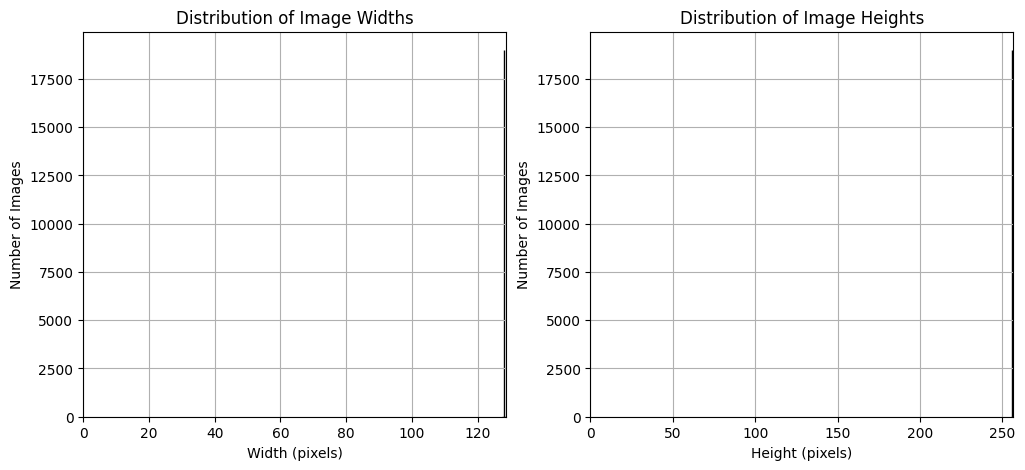

Number of images:19000


In [ ]:
plot_image_dimensions(input_folder)

-  we see that the images have been resized to a dimension of 128*256

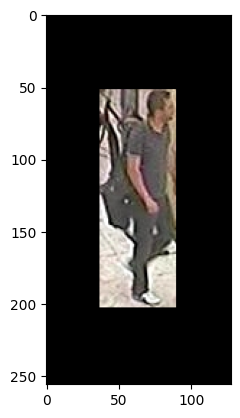

In [ ]:
image= plt.imread('PETA dataset/3DPeS/archive/1_1_FRAME_12_RGB.bmp')
plt.imshow(image)

- Now we proceed to filter the labels in the dataset.
- The PETA dataset contains a lot of features including gender mostly to do with the fashion of the person in the image, and hence a typical line in the label file label.txt looks like this:
Screenshot 2024-10-07 202251.png
- We only need the gender labels. i.e, 'personalMale' and 'personalFemale'.
- Also, for training purposes, the labels must be assosiated with the corresponding images.. the numbers in the label describe the person number, who can contain multiple frame images for themselves, or a single number might point to a single image. For e.g, the label described above is for the 3DPeS dataset, the number is 1 and contains the following images constituting the same person in different frames:
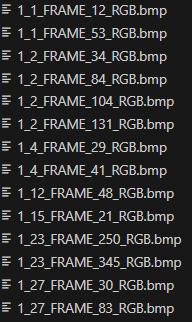
- But, for the CUHK dataset, we observe that the images are not again named as frames but directly as numbers while the labels have the file name:

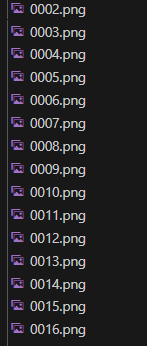

Screenshot 2024-10-07 210757.png

- For simplifying our task, we will remove '.png' from the labels of CUHK dataset and then add an underscore in the end of file names in it.likr this:

Screenshot 2024-10-07 233550.png

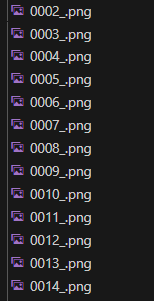

In [ ]:
#code to add underscore to file names.

# Define the directory where the files are located
directory = "./PETA dataset/CUHK/archive"

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file is a .png file
    if filename.endswith(".png"):
        # Construct the old file path
        old_file = os.path.join(directory, filename)

        # Construct the new file name by inserting '_' before '.png'
        new_filename = filename.replace(".png", "_.png")

        # Construct the new file path
        new_file = os.path.join(directory, new_filename)

        # Rename the file
        os.rename(old_file, new_file)
        print(f'Renamed: {filename} -> {new_filename}')

Renamed: 4532.png -> 4532_.png
Renamed: 2393.png -> 2393_.png
Renamed: 2751.png -> 2751_.png
Renamed: 2068.png -> 2068_.png
Renamed: 0387.png -> 0387_.png
Renamed: 1450.png -> 1450_.png
Renamed: 3831.png -> 3831_.png
Renamed: 1274.png -> 1274_.png
Renamed: 3817.png -> 3817_.png
Renamed: 2801.png -> 2801_.png
Renamed: 0708.png -> 0708_.png
Renamed: 1349.png -> 1349_.png
Renamed: 1400.png -> 1400_.png
Renamed: 0168.png -> 0168_.png
Renamed: 2397.png -> 2397_.png
Renamed: 1974.png -> 1974_.png
Renamed: 3405.png -> 3405_.png
Renamed: 0508.png -> 0508_.png
Renamed: 2354.png -> 2354_.png
Renamed: 2558.png -> 2558_.png
Renamed: 1838.png -> 1838_.png
Renamed: 1815.png -> 1815_.png
Renamed: 0392.png -> 0392_.png
Renamed: 0665.png -> 0665_.png
Renamed: 3918.png -> 3918_.png
Renamed: 2368.png -> 2368_.png
Renamed: 2814.png -> 2814_.png
Renamed: 4468.png -> 4468_.png
Renamed: 3017.png -> 3017_.png
Renamed: 2464.png -> 2464_.png
Renamed: 4409.png -> 4409_.png
Renamed: 3251.png -> 3251_.png
Renamed:

In [ ]:
# Assuming the uploaded file is named 'example.txt'
file_name = './PETA dataset/CUHK/archive/Label.txt'

# Read the content of the file
with open(file_name, 'r') as file:
    content = file.read()

# Replace '.png' with ''
new_content = content.replace('.png', '')

# Write the modified content back to the file
with open(file_name, 'w') as file:
    file.write(new_content)

with open(file_name, 'r') as file:
    content = file.read()
    print(content)


0606 upperBodyGrey lowerBodyGrey hairBlack footwearBlack lowerBodyCasual lowerBodyTrousers personalLess30 personalMale upperBodyCasual upperBodyLongSleeve hairShort footwearSneakers carryingOther accessoryNothing
1020 upperBodyBlack lowerBodyGrey hairBlack footwearBlack footwearWhite lowerBodyCasual lowerBodyJeans personalFemale personalLess30 upperBodyCasual upperBodyLongSleeve upperBodyOther hairLong footwearSneakers carryingMessengerBag accessoryNothing
3780 upperBodyGrey lowerBodyBrown hairBlack footwearGrey lowerBodyCasual lowerBodyTrousers personalLess30 personalMale upperBodyCasual upperBodyShortSleeve hairShort footwearShoes carryingNothing accessoryNothing
0509 upperBodyBlack upperBodyBlue lowerBodyBlack hairBlack footwearBlack lowerBodyCasual lowerBodySuits personalLess45 personalMale upperBodyCasual upperBodyLongSleeve upperBodySuit hairShort footwearLeatherShoes carryingNothing accessoryNothing
1799 upperBodyRed lowerBodyBlue hairBlack footwearPurple lowerBodyCasual lowerBo

# GENDER CLASSIFICATION FOR SURVEILLANCE IMAGES USING CNN

In [ ]:
import os

def get_label_dict(file_path):
    label_dict={} #dictionary containing person number and gender label as key value pairs.
    with open(file_path, 'r') as f:
       lines= f.readlines() #get the individual lines in text file.
       lines=[line.split() for line in lines] # turn it into a list of lists containing the labels in the individual lines.
       for line in lines:
           label_dict[line[0]]='male' if line.count('personalMale')>0 else 'female' # assign label based on the input.
    return label_dict


- So, now we'll make 2 lists.. one list with all the labels for each image in folder and other list for the corresponding image's numpy array.
- We will do this by iterating through each of the dataset folders and taking the correnponding label text files, extracting the labels using the above function, and appending the labels and images to their respective arrays.

In [ ]:
import numpy as np
from PIL import Image
dataset_path='PETA dataset'

label_list=[]
images_list=[]

for dataset in os.listdir(dataset_path):
    sub_dataset_path=os.path.join(dataset_path,dataset)
    archive_path=os.path.join(sub_dataset_path,'archive')
    label_file_path=os.path.join(archive_path,'Label.txt')
    labels=get_label_dict(label_file_path)
    for file in os.listdir(archive_path):
        if(file.endswith('.png') or file.endswith('.bmp') or file.endswith('.jpeg') or file.endswith('.jpg')):
            image = Image.open(os.path.join(archive_path,file))
            image_np=np.array(image)
            for key in labels.keys():
                if(file.startswith(key+'_')):
                    label_list.append(labels[key])
                    images_list.append(image_np)
images_list_np=np.array(images_list)
print(images_list_np)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

- We can see that the numpy array has a shape of (19000, 256, 128, 3), meaning it contains 19000 256x128 RGB images.
- Their corresponding images are stored in the imaes_list list.
- Now we take 25 random images from the dataset and check if they have been positioned properly with the labels in corresponding images.

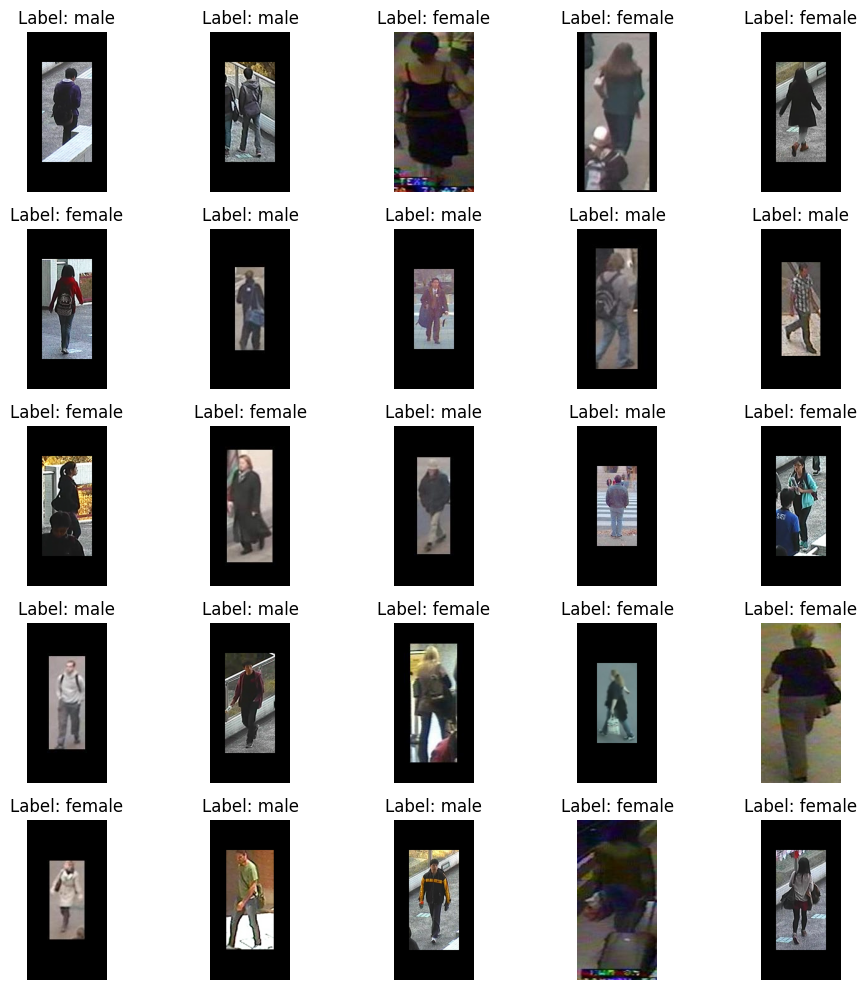

In [ ]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 25

# Randomly select 25 indices from the dataset
random_indices = np.random.choice(len(images_list_np), num_images, replace=False)

# Set up the figure for displaying images (5x5 grid)
plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    # Get the corresponding image and label
    image = images_list_np[idx]
    label = label_list[idx]

    # Display the image in a 5x5 grid
    plt.subplot(5, 5, i+1)  # 5x5 grid, current position i+1
    plt.imshow(image)
    plt.title(f'Label: {label}')  # Show the label as the title
    plt.axis('off')  # Hide axis ticks

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
#free up memory
del images_list

- Now we normalize the array.

In [ ]:
images_list_np = images_list_np/255

In [ ]:
print(images_list_np)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

- Now we turn our string labels, i.e, 'male' and 'female' to 0 and 1.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
label_list=lb.fit_transform(label_list).ravel()

In [ ]:
print(label_list)

[1 1 1 ... 1 1 0]


In [ ]:
from sklearn.model_selection._split import train_test_split
image_train,image_test,label_train,label_test=train_test_split(images_list_np,label_list,test_size=0.2,random_state=42)

In [ ]:
print(len(image_train))
print(len(image_test))
print(len(label_train))
print(len(label_test))

15200
3800
15200
3800


In [ ]:
#free up space
del images_list_np
del label_list

- Now, we construct the CNN model.

In [ ]:
import tensorflow as tf
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

strategy = tf.distribute.TPUStrategy(tpu)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

with strategy.scope():
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 128, 3)),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2, 2)),

      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2, 2)),

      layers.Conv2D(128, (3, 3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2, 2)),

      # Add additional layers here if necessary
      layers.Conv2D(256, (3, 3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2, 2)),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(1, activation='sigmoid')
  ])

  #compile the model.
  optimizer = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Train the model
model.fit(image_train,label_train,epochs=100,batch_size=32,validation_data=(image_test,label_test))

Epoch 1/100
475/475 [==============================] - 38s 54ms/step - loss: 0.8544 - accuracy: 0.5637 - val_loss: 0.6838 - val_accuracy: 0.5505
Epoch 2/100
475/475 [==============================] - 15s 31ms/step - loss: 0.6859 - accuracy: 0.5789 - val_loss: 0.6499 - val_accuracy: 0.5963
Epoch 3/100
475/475 [==============================] - 14s 30ms/step - loss: 0.6569 - accuracy: 0.5926 - val_loss: 0.6257 - val_accuracy: 0.6176
Epoch 4/100
475/475 [==============================] - 14s 30ms/step - loss: 0.6487 - accuracy: 0.6036 - val_loss: 0.6559 - val_accuracy: 0.5916
Epoch 5/100
475/475 [==============================] - 14s 30ms/step - loss: 0.6305 - accuracy: 0.6184 - val_loss: 0.6334 - val_accuracy: 0.6363
Epoch 6/100
475/475 [==============================] - 14s 30ms/step - loss: 0.6066 - accuracy: 0.6441 - val_loss: 0.5980 - val_accuracy: 0.6239
Epoch 7/100
475/475 [==============================] - 14s 30ms/step - loss: 0.5884 - accuracy: 0.6677 - val_loss: 0.5942 - val_ac

In [ ]:
loss, accuracy = model.evaluate(image_test,label_test)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

119/119 [==============================] - 4s 32ms/step - loss: 0.9423 - accuracy: 0.8563
Validation Loss: 0.9422650933265686, Validation Accuracy: 0.8563157916069031


In [ ]:
#save model.
model.save('gender_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
